# Approach Models

In [19]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to load and run the TFLite model
def evaluate_model(tflite_model_path, img_height, img_width, image_folders, class_labels, resizing):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize lists to hold true labels and predictions
    true_labels = []
    predictions = []

    # Process each folder and its images
    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                # Load and preprocess the image
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                if resizing == True:
                    img_array = np.array(img, dtype=np.float32)/ 255.0  # Rescale the image
                else:
                    img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

                # Set the tensor to the image
                interpreter.set_tensor(input_details[0]['index'], img_array)

                # Run inference
                interpreter.invoke()

                # Get the prediction
                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = (predictions_array[0] > 0.5).astype(int)[0]  # Binary classification threshold
                
                # Append the true label and prediction
                true_labels.append(label)
                predictions.append(predicted_class)

    # Convert class indices to names
    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, pos_label='y')
    recall = recall_score(true_labels, predictions, pos_label='y')
    f1 = f1_score(true_labels, predictions, pos_label='y')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'n', 1: 'y'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_n',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_approach_y'
}

# Evaluate the first model (best_model1_orig.tflite)
accuracy_1, precision_1, recall_1, f1_1, true_labels_1, predictions_1 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\best_model1_orig.tflite',
    img_height=64,
    img_width=64,
    image_folders=image_folders,
    class_labels=class_names,
    resizing=True
)

# Evaluate the second model (model_approach.tflite)
accuracy_2, precision_2, recall_2, f1_2, true_labels_2, predictions_2 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_approach.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names,
    resizing=False
)

# Print the results
print("Performance of Model 1:")
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1-Score: {f1_1:.4f}")

print("Performance of Model 2:")
print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1-Score: {f1_2:.4f}\n")

Performance of Model 1:
Accuracy: 0.7368
Precision: 0.8293
Recall: 0.5965
F1-Score: 0.6939
Performance of Model 2:
Accuracy: 0.8333
Precision: 0.8800
Recall: 0.7719
F1-Score: 0.8224



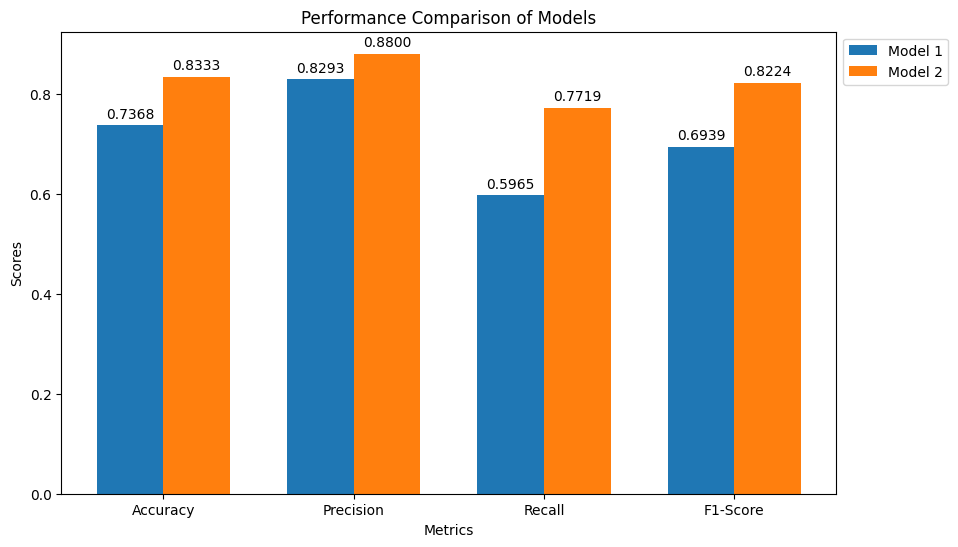

In [20]:
import matplotlib.pyplot as plt

# Metrics from the model evaluation
metrics_m1 = {
    'Accuracy': accuracy_1,
    'Precision': precision_1,
    'Recall': recall_1,
    'F1-Score': f1_1
}

metrics_m2 = {
    'Accuracy': accuracy_2,
    'Precision': precision_2,
    'Recall': recall_2,
    'F1-Score': f1_2
}

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(metrics_m1))
bar_width = 0.35

bar1 = ax.bar(index, metrics_m1.values(), bar_width, label='Model 1')
bar2 = ax.bar([i + bar_width for i in index], metrics_m2.values(), bar_width, label='Model 2')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_m1.keys())
# Adjust legend position to avoid cutting off bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

# HSR Models

In [21]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to load and run the TFLite model
def evaluate_model(tflite_model_path, img_height, img_width, image_folders, class_labels):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Initialize lists to hold true labels and predictions
    true_labels = []
    predictions = []

    # Process each folder and its images
    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                # Load and preprocess the image
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

                # Set the tensor to the image
                interpreter.set_tensor(input_details[0]['index'], img_array)

                # Run inference
                interpreter.invoke()

                # Get the prediction
                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = np.argmax(predictions_array, axis=1)[0]  # Get the class index
                
                # Append the true label and prediction
                true_labels.append(label)
                predictions.append(predicted_class)

    # Convert class indices to names
    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'h', 1: 'r', 2: 's'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_h',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_r',
    2: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_s'
}

# Evaluate the first model
accuracy_1, precision_1, recall_1, f1_1, true_labels_1, predictions_1 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs5.tflite',
    img_height=480,
    img_width=480,
    image_folders=image_folders,
    class_labels=class_names
)

# Evaluate the second model
accuracy_2, precision_2, recall_2, f1_2, true_labels_2, predictions_2 = evaluate_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs6.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Print the results
print("Performance of Model 1")
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1-Score: {f1_1:.4f}\n")

print("Performance of Model 2:")
print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1-Score: {f1_2:.4f}")


Performance of Model 1
Accuracy: 0.7673
Precision: 0.8630
Recall: 0.7673
F1-Score: 0.7668

Performance of Model 2:
Accuracy: 0.7925
Precision: 0.8721
Recall: 0.7925
F1-Score: 0.7847


plot results

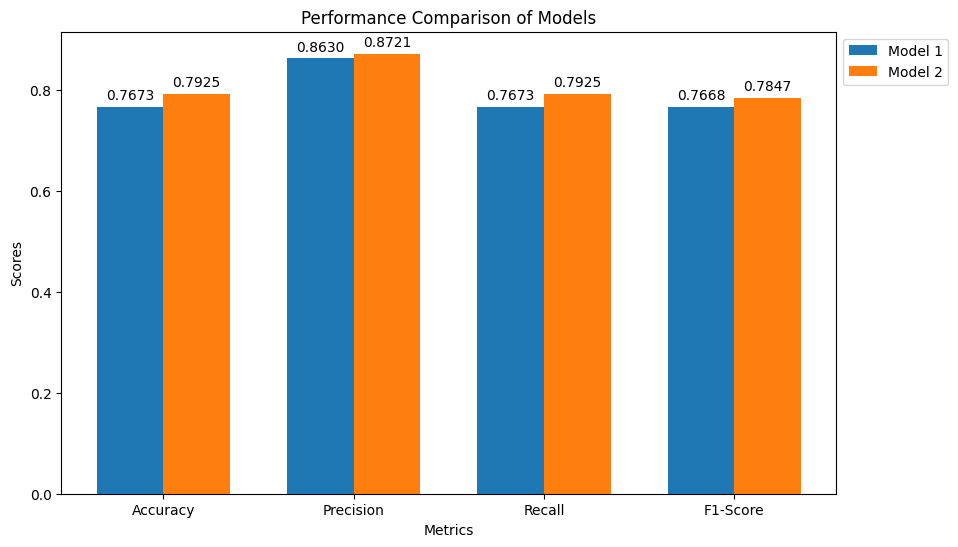

In [22]:
import matplotlib.pyplot as plt

metrics_m1 = {
    'Accuracy': accuracy_1,
    'Precision': precision_1,
    'Recall': recall_1,
    'F1-Score': f1_1
}

metrics_m2 = {
    'Accuracy': accuracy_2,
    'Precision': precision_2,
    'Recall': recall_2,
    'F1-Score': f1_2
}

fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(metrics_m1))
bar_width = 0.35

bar1 = ax.bar(index, metrics_m1.values(), bar_width, label='Model 1')
bar2 = ax.bar([i + bar_width for i in index], metrics_m2.values(), bar_width, label='Model 2')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_m1.keys())
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

## Compare h5 model to tflite

In [24]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate TFLite models
def evaluate_tflite_model(tflite_model_path, img_height, img_width, image_folders, class_labels):
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    true_labels = []
    predictions = []

    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)

                interpreter.set_tensor(input_details[0]['index'], img_array)
                interpreter.invoke()

                predictions_array = interpreter.get_tensor(output_details[0]['index'])
                predicted_class = np.argmax(predictions_array, axis=1)[0]
                
                true_labels.append(label)
                predictions.append(predicted_class)

    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Function to evaluate .h5 models
def evaluate_h5_model(h5_model_path, img_height, img_width, image_folders, class_labels):
    model = load_model(h5_model_path)

    true_labels = []
    predictions = []

    for label, folder in image_folders.items():
        for filename in os.listdir(folder):
            if filename.endswith(".jpg"): 
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))
                img_array = np.array(img, dtype=np.float32)
                img_array = np.expand_dims(img_array, axis=0)

                predictions_array = model.predict(img_array)
                predicted_class = np.argmax(predictions_array, axis=1)[0]
                
                true_labels.append(label)
                predictions.append(predicted_class)

    true_labels = [class_labels[label] for label in true_labels]
    predictions = [class_labels[pred] for pred in predictions]

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, true_labels, predictions

# Define class names and directories
class_names = {0: 'h', 1: 'r', 2: 's'}
image_folders = {
    0: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_h',
    1: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_r',
    2: 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\examples\\test_s'
}

# Evaluate the TFLite model
accuracy_tflite, precision_tflite, recall_tflite, f1_tflite, true_labels_tflite, predictions_tflite = evaluate_tflite_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs6.tflite',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Evaluate the .h5 model
accuracy_h5, precision_h5, recall_h5, f1_h5, true_labels_h5, predictions_h5 = evaluate_h5_model(
    'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\models\\model_hrs6.h5',
    img_height=180,
    img_width=180,
    image_folders=image_folders,
    class_labels=class_names
)

# Print the results
print("Performance of model_hrs6.tflite:")
print(f"Accuracy: {accuracy_tflite:.9f}")
print(f"Precision: {precision_tflite:.9f}")
print(f"Recall: {recall_tflite:.9f}")
print(f"F1-Score: {f1_tflite:.9f}\n")

print("Performance of model_hrs6.h5:")
print(f"Accuracy: {accuracy_h5:.9f}")
print(f"Precision: {precision_h5:.9f}")
print(f"Recall: {recall_h5:.9f}")
print(f"F1-Score: {f1_h5:.9f}")


1/1 [==============================] - 0s 10ms/step
Performance of model_hrs6.tflite:
Accuracy: 0.792452830
Precision: 0.872093023
Recall: 0.792452830
F1-Score: 0.784703540

Performance of model_hrs6.h5:
Accuracy: 0.792452830
Precision: 0.872093023
Recall: 0.792452830
F1-Score: 0.784703540


Conversion does not affect performance.